# Exploratory Data Analysis

This section of our investigation is devoted to showing relationships in our data through the use of visualizations. We will pose a question, and then construct a graph to quickly and consicely communicate the answer to the question posed. Important to note is that we have two types of data to investigate. First, we will complete traditional EDA on our dataframe followed by EDA completed on our cleaned bag of words constructed in the previous notebook. Natural language requires different methods for exploring, so this will be the second part of our EDA. 

# Dataframe EDA

In [2]:
# we import all necessary tools

from fsds.imports import * 

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist

import string

import pandas as pd
import numpy as np


df = pd.read_csv('data/intro_df.csv')

fsds v0.2.27 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [3]:
eda_df = df.copy()
eda_df.head()

,id,text,product,sentiment
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive
2,2,@swonderlin Can not wait for iPad 2 also. They...,iPad,positive
3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative
4,4,@sxtxstate great stuff on Fri SXSW: Marissa Ma...,Google,positive


## 1. How are the lengths of our tweets distributed?

In [4]:
char_lengths = []
word_counts = []

for i in df['text']:
    
    char_length = len(str(i))
    char_lengths.append(char_length)
    
    word_count = len((str(i).split(' ')))
    word_counts.append(word_count)
    
eda_df['char_len'] = char_lengths
eda_df['word_count'] = word_counts


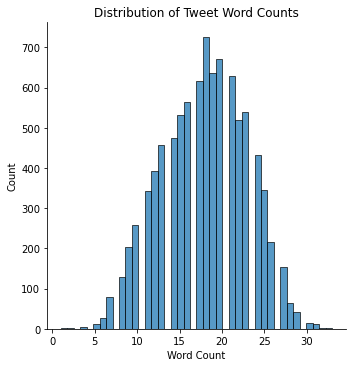

In [5]:

word_count = sns.displot(data = eda_df, x = 'word_count')
word_count.set(title = 'Distribution of Tweet Word Counts', xlabel = 'Word Count')

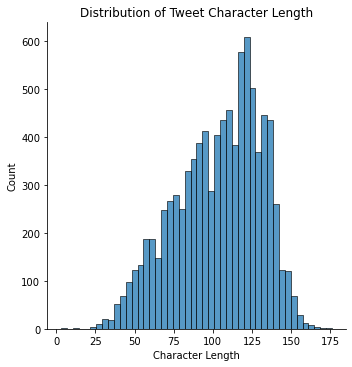

In [6]:
char_len = sns.displot(eda_df, x = 'char_len')
char_len.set(title = 'Distribution of Tweet Character Length', xlabel = 'Character Length')

## 2. How many tweets reference Apple compared to Google?

In [7]:

google = ['Google', 'Other Google product or service', 'Android App', 'Android']
apple = ['iPad', 'Apple', 'iPad or iPhone App', 'iPhone', 'Other Apple product or service']
is_google = []
is_apple = []

In [8]:

for i in range(len(df)):
    prod = df['product'][i]
    if prod in google:
        is_google.append(1)
        is_apple.append(0)
    elif prod in apple:
        is_google.append(0)
        is_apple.append(1)
    else:
        is_google.append(0)
        is_apple.append(0)
        


In [9]:

product_df = df.where(df['product'].notna())

product_df['is_google'] = is_google
product_df['is_apple'] = is_apple

graph_df = product_df.dropna()


<AxesSubplot:title={'center':'# of tweets related to Apple V Google'}, xlabel='Company', ylabel='Count'>

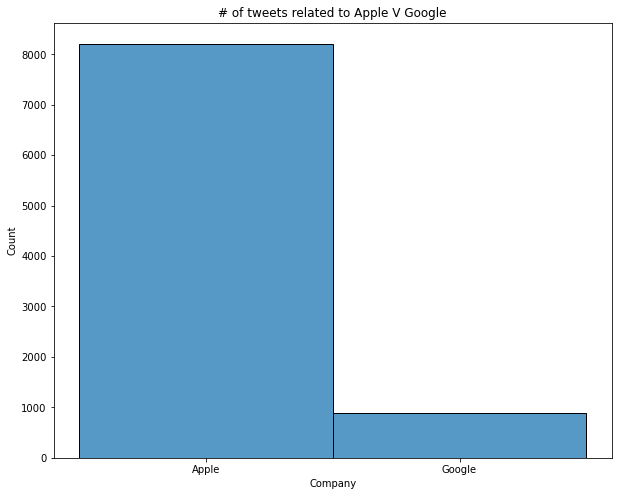

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))
plt.title('# of tweets related to Apple V Google')
plt.xlabel('Company')
xlabel = ['Apple', 'Google']
plt.xticks([0.25, 0.75], xlabel)

sns.histplot(x = product_df['is_google'], binwidth = 0.5)

## 3. How many tweets contain sentiment compared to those with none? And positive sentiment compared to negative sentiment?

In [11]:
sentiment = ['positive', 'negative']

has_sentiment = []
positive_sentiment = []

for i in df['sentiment']:
    
    if i in sentiment:
        has_sentiment.append(1)
        
        if i == 'positive':
            positive_sentiment.append(1)
        else:
            positive_sentiment.append(0)
    else:
        has_sentiment.append(0)
        positive_sentiment.append(0)
        
product_df['has_sentiment'] = has_sentiment
product_df['pos_sentiment'] = positive_sentiment


<AxesSubplot:title={'center':'Neutral V Sentimental tweets'}, xlabel='Contains Emotion?', ylabel='Count'>

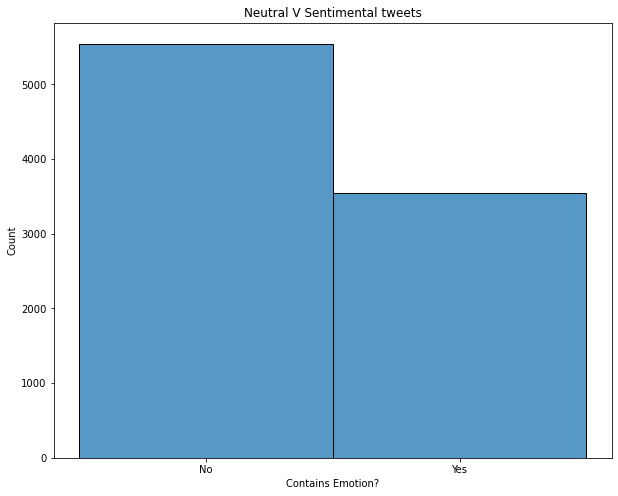

In [12]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 8))
plt.title("Neutral V Sentimental tweets")
plt.xlabel('Contains Emotion?')
plt.xticks([0.25, 0.75], ['No', 'Yes'])
sns.histplot(x = product_df['has_sentiment'], binwidth = 0.5)

<AxesSubplot:xlabel='pos_sentiment', ylabel='Count'>

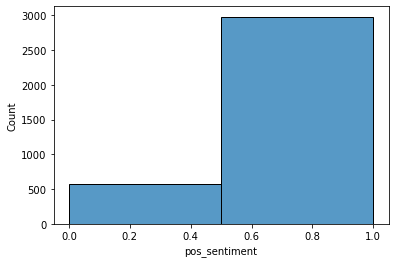

In [13]:

df_sentiment = product_df.where(product_df['has_sentiment'] == 1)

sns.histplot(x = df_sentiment['pos_sentiment'], binwidth = 0.5)

## 4. How is sentiment distributed within Apple and Google? Does one company have a higher percentage of negative to positive tweets?

[Text(0.25, 0, 'Negative'), Text(0.75, 0, 'Positive')]

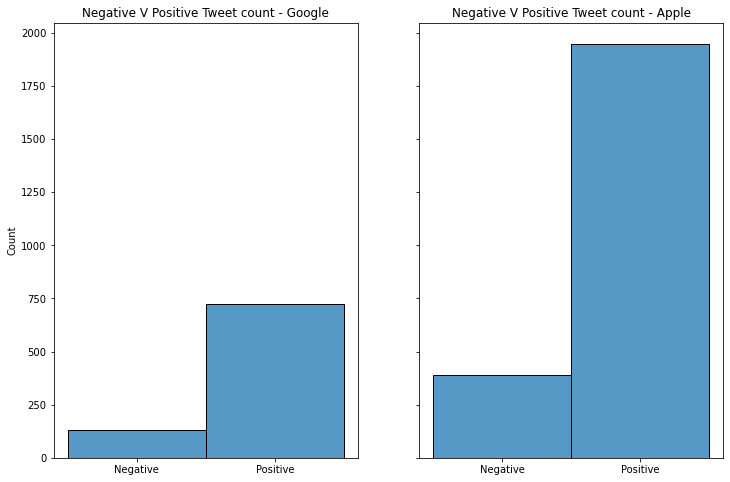

In [14]:

df_sentiment_google = df_sentiment.where(df_sentiment['is_google'] == 1)
df_sentiment_apple = df_sentiment.where(df_sentiment['is_apple'] == 1)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 8), sharey = True)

goog = sns.histplot(x = df_sentiment_google['pos_sentiment'], ax = axes[0], binwidth = 0.5)
app = sns.histplot(x = df_sentiment_apple['pos_sentiment'], ax = axes[1], binwidth = 0.5)
goog.set(title = "Negative V Positive Tweet count - Google", xlabel = '')
app.set(title = "Negative V Positive Tweet count - Apple", xlabel = '')
goog.set_xticks([0.25, .75])
app.set_xticks([0.25, .75])
goog.set_xticklabels(['Negative', 'Positive'])
app.set_xticklabels(['Negative', 'Positive'])

# Bag of Words EDA

We are limited in the number of unique visualizations that are available to use on natural language. One of the most popular visualizations is a 'word cloud' which if you do not know what that is, we guarantee that you have seen one before. By coupling the vizualizations from our datafame EDA above with wordclouds, we will have a better picture of the contents of the tweets of each of the above comparisons. 

## Cloud of all tweets

In [15]:


from wordcloud import WordCloud

stops = (stopwords.words('english') +
        list(string.punctuation) +
        ['“','”','...',"''",'’','``'] + 
        ["rt", "'s", "n't", "'re", "'m", "'ll", "--", "..",'link', 'mention', 'austin', 'SXSW', 'sxsw', 'quot'] +
        [str(i) for i in range(0, 10)])

In [16]:


cleaned_tokens_df = pd.read_csv('data/intro_tokens.csv')

cleaned_tokens_df = cleaned_tokens_df.dropna()

cleaned_tokens = cleaned_tokens_df['0'].tolist()

cleaned_tokens


['wesley83',
 '3g',
 'iphon',
 'hr',
 'tweet',
 'rise_austin',
 'wa',
 'dead',
 'need',
 'upgrad',
 'plugin',
 'station',
 'sxsw.',
 'jessede',
 'know',
 'fludapp',
 'awesom',
 'ipad/iphon',
 'app',
 'like',
 'appreci',
 'design',
 'also',
 'give',
 'free',
 'ts',
 'sxsw',
 'swonderlin',
 'wait',
 'ipad',
 'also',
 'sale',
 'sxsw.',
 'sxsw',
 'hope',
 'thi',
 'year',
 'festiv',
 'crashi',
 'thi',
 'year',
 'iphon',
 'app',
 'sxsw',
 'sxtxstate',
 'great',
 'stuff',
 'fri',
 'sxsw',
 'marissa',
 'mayer',
 'googl',
 'tim',
 "o'reilli",
 'tech',
 'books/confer',
 'amp',
 'matt',
 'mullenweg',
 'wordpress',
 'teachntech00',
 'new',
 'ipad',
 'app',
 'speechtherapi',
 'commun',
 'showcas',
 'sxsw',
 'confer',
 '49n4m',
 'iear',
 'edchat',
 'asd',
 'sxsw',
 'start',
 'ctia',
 'around',
 'corner',
 'googleio',
 'onli',
 'hop',
 'skip',
 'jump',
 'good',
 'time',
 'android',
 'fan',
 'beauti',
 'smart',
 'simpl',
 'idea',
 'madebymani',
 'thenextweb',
 'wrote',
 'hollergram',
 'ipad',
 'app',


Text(0.5, 1.0, 'Word Cloud of all Tweets')

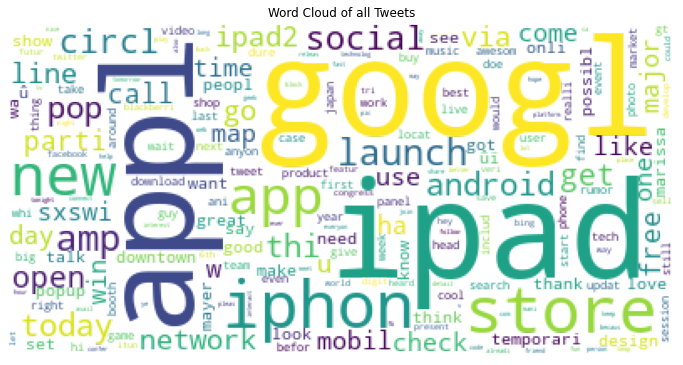

In [25]:


wordcloud = WordCloud(stopwords = stops, collocations = False, background_color="rgba(255, 255, 255, 0)", mode="RGBA")

wordcloud.generate(",".join((cleaned_tokens)))

plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of all Tweets')

## Cloud of tweets in reference to Apple compared to Google

In [26]:
from PIL import Image

(-0.5, 624.5, 587.5, -0.5)

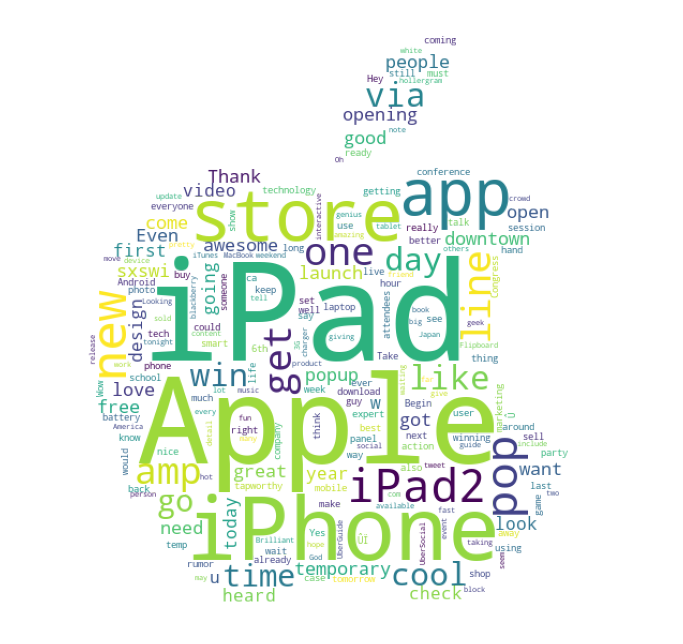

In [27]:



df_sentiment_apple = df_sentiment_apple.dropna()

full_list = df_sentiment_apple['text'].to_list()
raw_bag = ','.join(map(str, full_list))
raw_tokens = word_tokenize(raw_bag)

mask = np.array(Image.open('images/Apple_logo.PNG'))

wordcloud = WordCloud(stopwords = stops, collocations = False, mask = mask, background_color="rgba(255, 255, 255, 0)", mode="RGBA")
wordcloud.generate(','.join(raw_tokens))

plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')


(-0.5, 625.5, 625.5, -0.5)

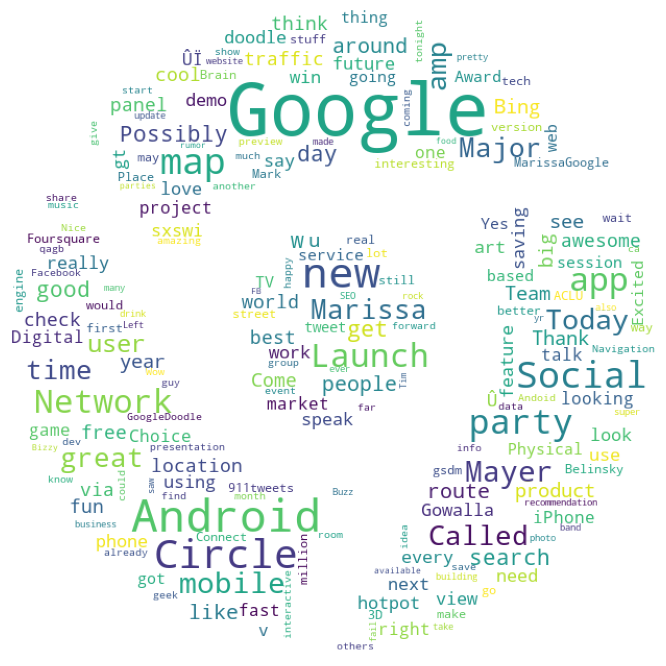

In [28]:
df_sentiment_google = df_sentiment_google.dropna()

full_list = df_sentiment_google['text'].to_list()
raw_bag = ','.join(map(str, full_list))
raw_tokens = word_tokenize(raw_bag)

mask = np.array(Image.open('images/Google_logo.jpg'))

wordcloud = WordCloud(stopwords = stops, collocations = False, mask = mask, background_color="rgba(255, 255, 255, 0)", mode="RGBA")
wordcloud.generate(','.join(raw_tokens))

plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')

## Cloud of Neutral tweets compared to sentimental tweets

(-0.5, 399.5, 199.5, -0.5)

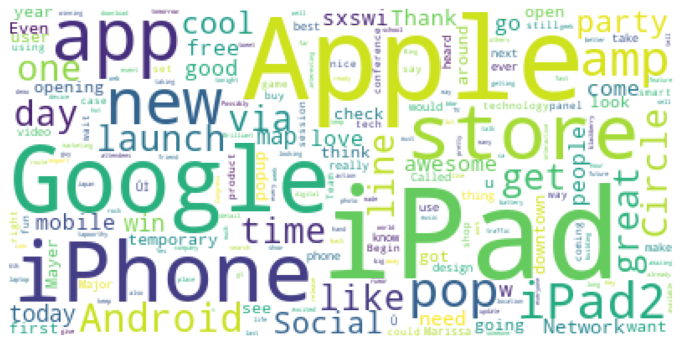

In [29]:
df_sentiment = df_sentiment.dropna()

df_pos_sentiment = df_sentiment.where(df_sentiment['pos_sentiment'] == 1).dropna()
df_neg_sentiment = df_sentiment.where(df_sentiment['pos_sentiment'] == 0).dropna()
df_neutral = product_df.where(product_df['has_sentiment'] == 0).dropna()

full_list = df_sentiment['text'].to_list()

raw_bag = ','.join(map(str, full_list))

raw_tokens = word_tokenize(raw_bag)

wordcloud = WordCloud(stopwords = stops, collocations = False, background_color="rgba(255, 255, 255, 0)", mode="RGBA")
wordcloud.generate(','.join(raw_tokens))

plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

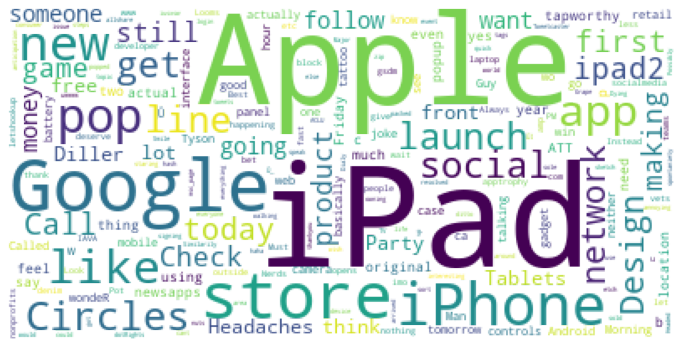

In [30]:
full_list = df_neutral['text'].to_list()

raw_bag = ','.join(map(str, full_list))

raw_tokens = word_tokenize(raw_bag)

wordcloud = WordCloud(stopwords = stops, collocations = False, background_color="rgba(255, 255, 255, 0)", mode="RGBA")
wordcloud.generate(','.join(raw_tokens))

plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')

## Cloud of Positive tweets compared to Negative tweets

(-0.5, 399.5, 199.5, -0.5)

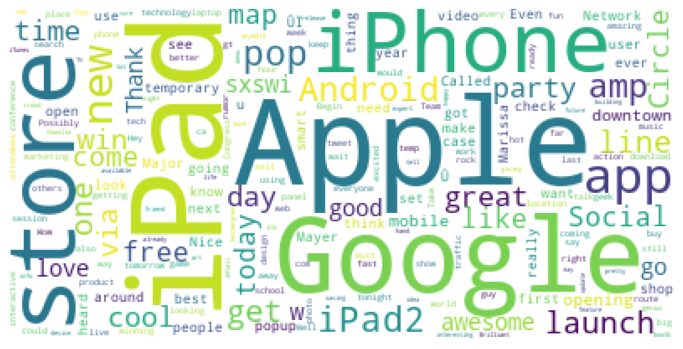

In [31]:
full_list = df_pos_sentiment['text'].to_list()

raw_bag = ','.join(map(str, full_list))

raw_tokens = word_tokenize(raw_bag)

wordcloud = WordCloud(stopwords = stops, collocations = False, background_color="rgba(255, 255, 255, 0)", mode="RGBA")
wordcloud.generate(','.join(raw_tokens))

plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

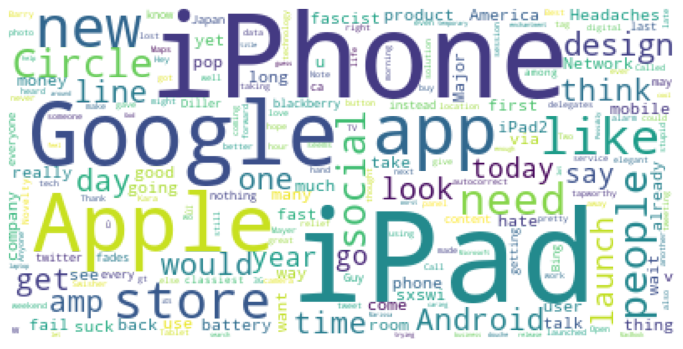

In [32]:
full_list = df_neg_sentiment['text'].to_list()

raw_bag = ','.join(map(str, full_list))

raw_tokens = word_tokenize(raw_bag)

wordcloud = WordCloud(stopwords = stops, collocations = False, background_color="rgba(255, 255, 255, 0)", mode="RGBA")
wordcloud.generate(','.join(raw_tokens))

plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')

### Bringing it all together

In [33]:
df_sentiment # we need this df for phase 2 of modelling. 

,id,text,product,sentiment,is_google,is_apple,has_sentiment,pos_sentiment
0,0.0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,0.0,1.0,1.0,0.0
1,1.0,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,0.0,1.0,1.0,1.0
2,2.0,@swonderlin Can not wait for iPad 2 also. They...,iPad,positive,0.0,1.0,1.0,1.0
3,3.0,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,0.0,1.0,1.0,0.0
4,4.0,@sxtxstate great stuff on Fri SXSW: Marissa Ma...,Google,positive,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
9077,9077.0,@mention your PR guy just convinced me to swit...,iPhone,positive,0.0,1.0,1.0,1.0
9079,9079.0,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,positive,0.0,1.0,1.0,1.0
9080,9080.0,Diller says Google TV &quot;might be run over ...,Other Google product or service,negative,1.0,0.0,1.0,0.0
9085,9085.0,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,positive,0.0,1.0,1.0,1.0


In [49]:
df_sentiment.to_csv('data/sentimental_df.csv', index_label = 'id')